## Stock Market Sentiment Analyzer

### **Project Overview**
This project aims to analyze sentiment in stock market-related tweets using Natural Language Processing (NLP). By leveraging **Hugging Face's FinBERT model**, we classify tweets as **positive, negative, or neutral** and explore how sentiment correlates with stock markettrends. 

In [28]:
# Important Necessary Libraries
import pandas as pd
import yfinance as yf 
import requests 
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [11]:
from datasets import load_dataset

# Load datasets 
dataset = load_dataset ("StephanAkkerman/stock-market-tweets-data")

print(['train'][0:5])

['train']


### Cleaning Step 

In [31]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text) # Remove URL
    text = re.sub(r'@\w+', '', text)    # Remove mentions @user 
    text = re.sub(r'#\w+','', text)     # Remove hashtags
    return text.strip()


for i in range(5):
    text = clean_text(dataset['train'][i]['text'])
    result = sentiment_pipeline(text)
    print(f"Tweet:{text}\nSentiment:{result[0]['label']} (Confidence: {result[0]['score']:.2f})\n")

Tweet:very very little volume. With $10T you'd think they could have $SPX  trading at 10,000 by now.
Sentiment:neutral (Confidence: 0.55)

Tweet:achieved Target 2780 closing above 50%   level, momentum still up. possible push towards 2842-2886 next week. $SPX $SPY
Sentiment:positive (Confidence: 0.94)

Tweet:RT : Silver/Gold indicator creates one of the largest bullish reversal patterns in decades while testing multi-decade suppor…
Sentiment:positive (Confidence: 0.90)

Tweet:Hedged our $MSFT position into close. Seemed to be getting lazy over this past week.
Sentiment:negative (Confidence: 0.95)

Tweet:RT : 3 Surprisingly Controversial Stocks in Donald Trump's Portfolio   $GILD $MO
Sentiment:neutral (Confidence: 0.73)



In [19]:
# Hugging Face Transformers for Sentiment Analysis
from transformers import pipeline

# Load FinBERT model
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

Device set to use mps:0


In [13]:
text = dataset['train'][0]['text']
result = sentiment_pipeline(text)
print(result)

[{'label': 'neutral', 'score': 0.536605179309845}]


In [23]:
for i in range(5): 
    text = dataset['train'][i]['text']
    result = sentiment_pipeline(text)
    print(f"Tweet:{text}\nSentiment:{result[0]['label']} (Confidence: {result[0]['score']:.2f})\n")

Tweet:@KennyDegu very very little volume. With $10T you'd think they could have $SPX  trading at 10,000 by now.
Sentiment:neutral (Confidence: 0.54)

Tweet:#ES_F achieved Target 2780 closing above 50% #Fibonacci  level, momentum still up. possible push towards 2842-2886 next week. $SPX $SPY  #tradign #futures https://t.co/wD2A0102nC
Sentiment:positive (Confidence: 0.85)

Tweet:RT @KimbleCharting: Silver/Gold indicator creates one of the largest bullish reversal patterns in decades while testing multi-decade suppor…
Sentiment:positive (Confidence: 0.76)

Tweet:@Issaquahfunds Hedged our $MSFT position into close. Seemed to be getting lazy over this past week.
Sentiment:negative (Confidence: 0.95)

Tweet:RT @zipillinois: 3 Surprisingly Controversial Stocks in Donald Trump's Portfolio @themotleyfool #stocks $GILD $MO https://t.co/d9hlJnSRN3
Sentiment:neutral (Confidence: 0.76)



/var/folders/z7/jj2xy8g53jnd942hm_zfr1340000gn/T/ipykernel_37986/213220588.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sentiment_df, x='Sentiment', palette='coolwarm')


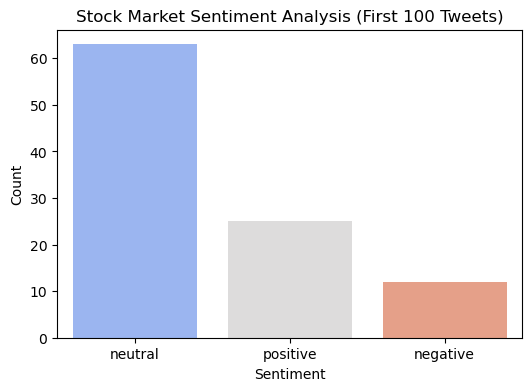

In [33]:
# Collect sentiment results for 100 tweets 
sentiments = []
for i in range(100): 
    text = clean_text(dataset['train'][i]['text'])
    result = sentiment_pipeline(text)
    sentiments.append(result[0]['label'])

# Convert to DataFrame 
sentiment_df = pd.DataFrame(sentiments, columns=['Sentiment'])

plt.figure(figsize=(6,4))
sns.countplot(data=sentiment_df, x='Sentiment', palette='coolwarm')
plt.title("Stock Market Sentiment Analysis (First 100 Tweets)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()